<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#A-Brief-matplotlib-API-Primer" data-toc-modified-id="A-Brief-matplotlib-API-Primer-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>A Brief matplotlib API Primer</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Adjusting-the-spacing-around-subplots" data-toc-modified-id="Adjusting-the-spacing-around-subplots-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Adjusting the spacing around subplots</a></span></li></ul></li><li><span><a href="#Colors,-Markers,-and-Line-Styles" data-toc-modified-id="Colors,-Markers,-and-Line-Styles-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Colors, Markers, and Line Styles</a></span></li><li><span><a href="#Ticks,-Labels,-Legend" data-toc-modified-id="Ticks,-Labels,-Legend-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ticks, Labels, Legend</a></span><ul class="toc-item"><li><span><a href="#Setting-the-title,-axis-labels,-ticks,-and-ticklabels" data-toc-modified-id="Setting-the-title,-axis-labels,-ticks,-and-ticklabels-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Setting the title, axis labels, ticks, and ticklabels</a></span></li><li><span><a href="#Adding-Legends" data-toc-modified-id="Adding-Legends-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Adding Legends</a></span></li></ul></li><li><span><a href="#Annotations-and-drawing-on-a-Subplot" data-toc-modified-id="Annotations-and-drawing-on-a-Subplot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Annotations and drawing on a Subplot</a></span></li></ul></li><li><span><a href="#Plotting-with-pandas-and-seaborn" data-toc-modified-id="Plotting-with-pandas-and-seaborn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting with pandas and seaborn</a></span><ul class="toc-item"><li><span><a href="#Line-Plots" data-toc-modified-id="Line-Plots-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Line Plots</a></span></li><li><span><a href="#Bar-Plots" data-toc-modified-id="Bar-Plots-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Bar Plots</a></span></li><li><span><a href="#Histograms-and-Density-Plots" data-toc-modified-id="Histograms-and-Density-Plots-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Histograms and Density Plots</a></span></li><li><span><a href="#Scatter-or-Points-Plots" data-toc-modified-id="Scatter-or-Points-Plots-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Scatter or Points Plots</a></span></li><li><span><a href="#Facet-Grids-and-Categorical-Data" data-toc-modified-id="Facet-Grids-and-Categorical-Data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Facet Grids and Categorical Data</a></span></li></ul></li></ul></div>

Code and text from **Python for Data Analysis** By **Wes McKinney** 
    - Chapter 9 => **Plotting and Visualization**
Github - [pydata-book](https://github.com/wesm/pydata-book)


In [1]:
# %matplotlib notebook
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

# A Brief matplotlib API Primer

In [3]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

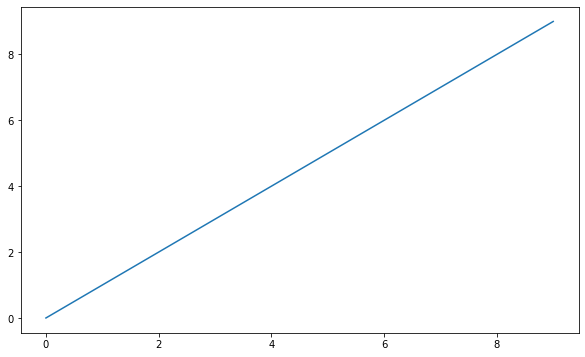

In [4]:
plt.plot(data)

Plots in matplotlib reside within a **Figure** object. You can create a new figure with **plt.figure**

You can’t make a plot with a blank figure. You have to create one or more subplots using **add_subplot**

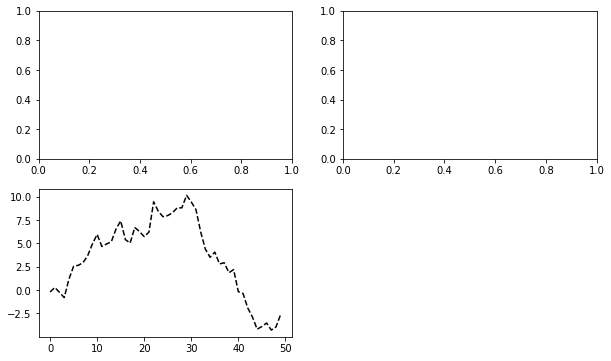

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

# 'k--' is a style option instructing matplotlib to plot a black dashed line

The objects returned by **fig.add_subplot** here are **AxesSubplot objects**, on which you can directly plot on the other empty subplots by calling each one’s instance method

In [6]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

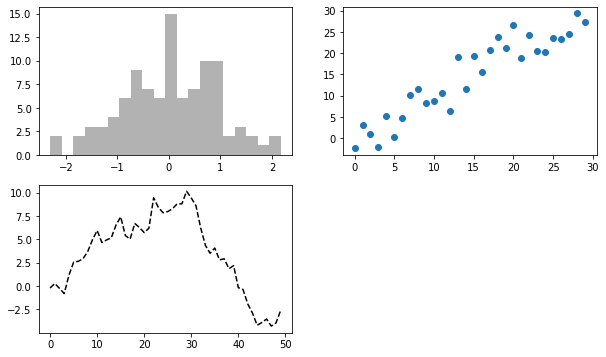

In [7]:
fig

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, **plt.subplots**, that creates a new figure and returns a NumPy array containing the created subplot objects

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F96DA02A48>,
      dtype=object)

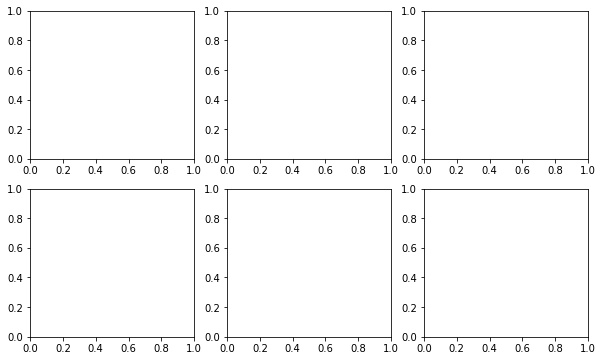

In [8]:
fig, axes = plt.subplots(2, 3)
axes


# axes array can be easily indexed like a two-dimensional
# array; for example, axes[0, 1].

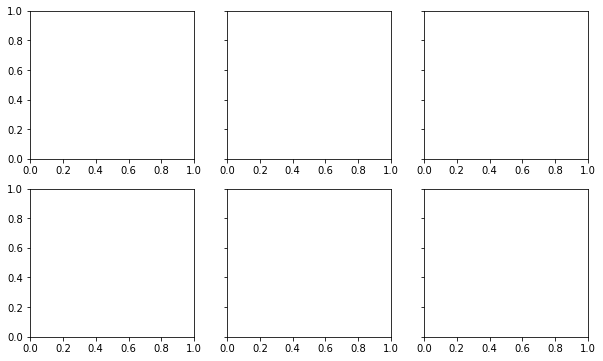

In [9]:
# ou can also indicate that subplots should have the
# same x- or y-axis using sharex and sharey, respectively

fig, axes = plt.subplots(2, 3, sharey=True)

**pyplot.subplots options**

|Argument| Description|
|--|--|
|nrows| Number of rows of subplots|
|ncols| Number of columns of subplots|
|sharex| All subplots should use the same x-axis ticks (adjusting the xlim will affect all subplots)|
|sharey| All subplots should use the same y-axis ticks (adjusting the ylim will affect all subplots)|
|subplot_kw| Dict of keywords passed to add_subplot call used to create each subplot|
|**fig_kw| Additional keywords to subplots are used when creating the figure, such as plt.subplots(2, 2, figsize=(8, 6))|


### Adjusting the spacing around subplots

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This spacing is all specified relative to the height and width of the plot, so that if you resize the plot either programmatically or manually using the GUI window, the plot will dynamically adjust itself. You can change the spacing using the **subplots_adjust** method on Figure objects, also available as a top-level function

***subplots_adjust(left=None, bottom=None, right=None, top=None,                                wspace=None, hspace=None)***

**wspace** and **hspace** controls the percent of the figure width and figure height, respec‐
tively, to use as spacing between subplots.

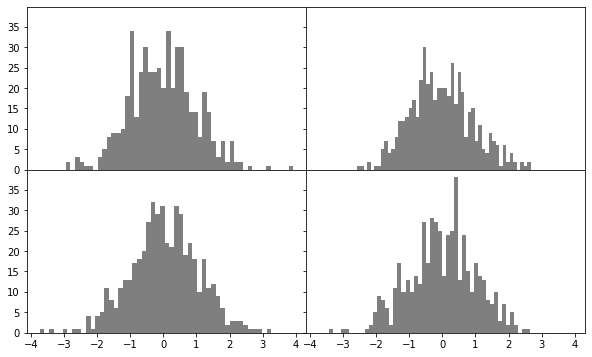

In [10]:
# shrinking spaces to zero

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

plt.subplots_adjust(wspace=0, hspace=0)

## Colors, Markers, and Line Styles


In [11]:
# plot function accepts an array of x and y and optionally a string abbreviation
# indicating color and line style
# ax.plot(x, y, 'g--')

# In practice 
# ax.plot(x, y, linestyle='--', color='g')

In [12]:
# ?matplotlib.pyplot.plot

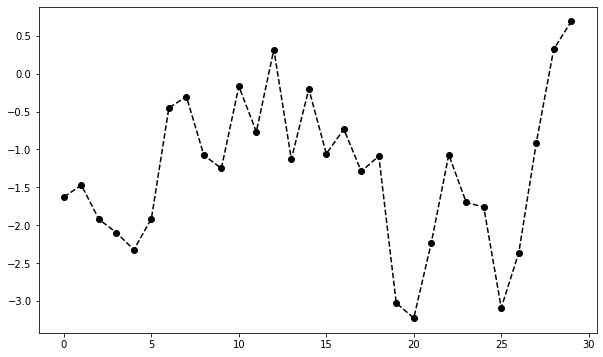

In [13]:
# using MARKERS to highlight the actual data points

from numpy.random import randn
# plt.plot(randn(30).cumsum(), 'ko--')
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

For line plots, you will notice that subsequent points are linearly interpolated by default. This can be altered with the **drawstyle** option

In [14]:
data = np.random.randn(30).cumsum()

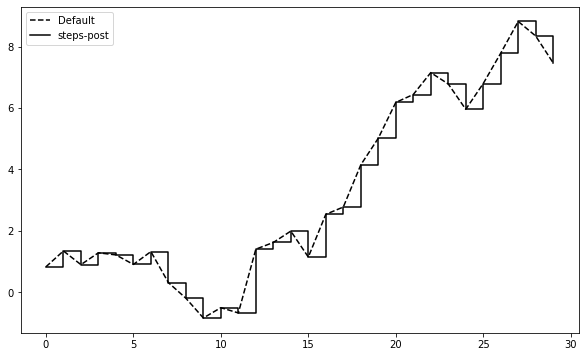

In [15]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

## Ticks, Labels, Legend

The pyplot interface, designed for interactive use, consists of methods like  **xlim, xticks, xticklabels => plot range, tick locations, tick labels**, respectively.     
They can be used in two ways:
   * Called with no arguments returns the current parameter value (e.g., plt.xlim() returns the current x-axis plotting range)
   * Called with parameters sets the parameter value (e.g., plt.xlim([0, 10]), sets the x-axis range to 0 to 10)

### Setting the title, axis labels, ticks, and ticklabels


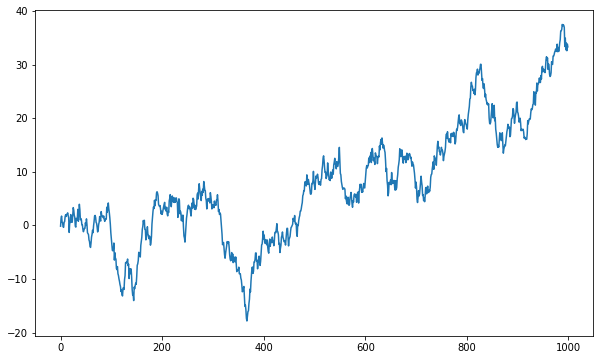

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

To change the x-axis ticks, it’s easiest to use **set_xticks** and **set_xticklabels**. The former instructs matplotlib where to place the ticks along the data range; by default these locations will also be the labels. But we can set any other values as the labels using set_xticklabels

In [17]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

In [18]:
ax.set_title('My first matplotlib Plotting and Visualization.ipynb')

Text(0.5, 1, 'My first matplotlib Plotting and Visualization.ipynb')

In [19]:
ax.set_xlabel('Stages')

# similar steps for y-axis

Text(0.5, 3.200000000000003, 'Stages')

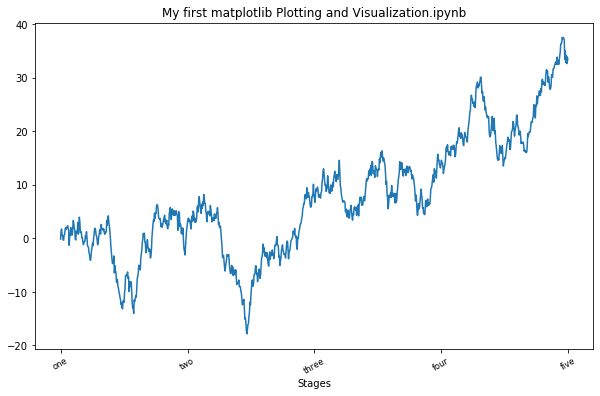

In [20]:
fig


The axes class has a **set** method that allows batch setting of plot properties. From the prior example, we could also have written

In [21]:
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 17.200000000000003, 'Stages'),
 Text(0.5, 1, 'My first matplotlib plot')]

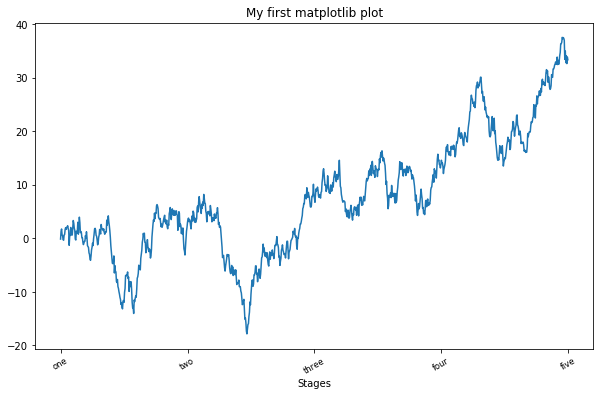

In [22]:
fig

### Adding Legends

Legends are another critical element for identifying plot elements

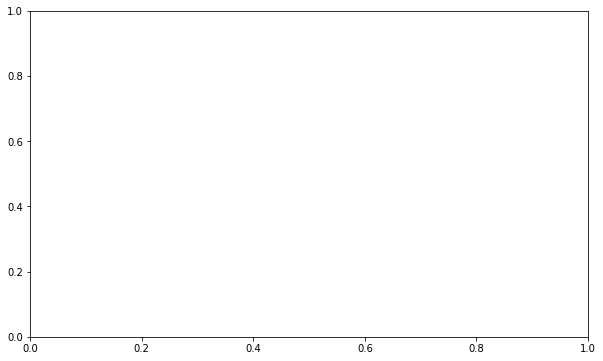

In [23]:
fig = plt.figure(); ax=fig.add_subplot(1, 1, 1)

In [24]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [25]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [26]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [27]:
ax.legend(loc='best')

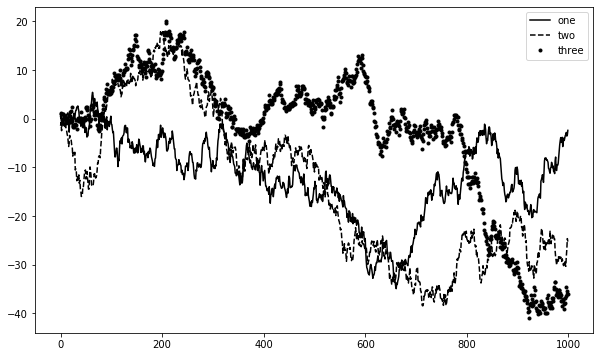

In [28]:
fig

## Annotations and drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. You can add annotations and text using the **text**, **arrow**, and **annotate** functions.

In [29]:
# text draws text at given coordinates (x, y) on the plot 
# with optional custom styling

# ax.text(x, y, 'hello world',
#        family='monospace', fontsize=10)

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

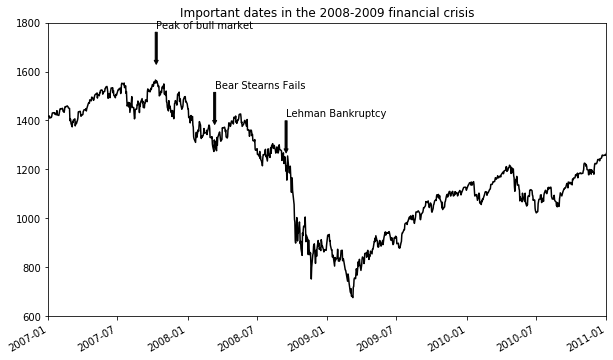

In [30]:
# Annotations can draw both text and arrows arranged appropriately

from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv(r'examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 255),
               arrowprops=dict(facecolor='black', headwidth=4, width=2,
                              headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in the 2008-2009 financial crisis')

In [31]:
# drawing shapes
# matplotlib has objects that represent many common shapes, referred to as patches


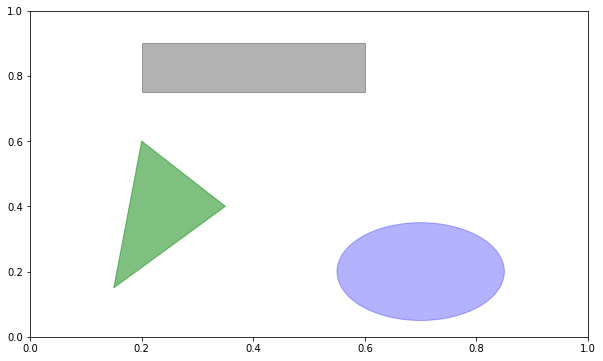

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)

pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

# Plotting with pandas and seaborn

In pandas we may have multiple columns of data, along with row and column labels. Pandas itself has built-in methods that simplify creating visualizations from DataFrame and Series objects. Another library is **seaborn**, a statistical graphics library created by Michael Waskom. Seaborn simplifies creating many common visualization
types.


Importing seaborn modifies the default matplotlib color schemes
and plot styles to improve readability and aesthetics. Even if you do
not use the seaborn API, you may prefer to import seaborn as a
simple way to improve the visual aesthetics of general matplotlib
plots.


## Line Plots

Series and DataFrame each have a plot attribute for making some basic plot types. By default, ***plot()*** makes line plots

In [33]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

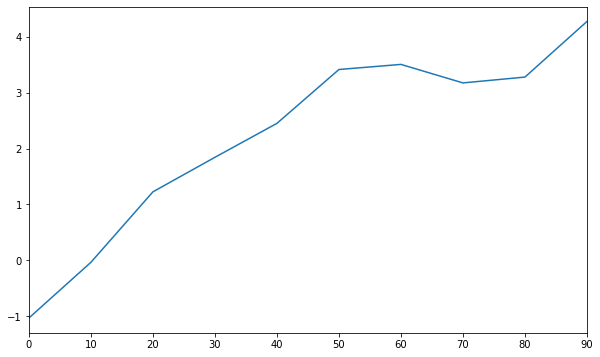

In [34]:
s.plot()

The Series object’s ***index*** is passed to matplotlib for plotting on the ***x-axis***, though you can disable this by passing **use_index=False**. The x-axis ticks and limits can be adjusted with the xticks and xlim options, and y-axis respectively with yticks and ylim. 

Most of pandas’s plotting methods accept an optional ***ax*** parameter, which can be a
matplotlib subplot object.

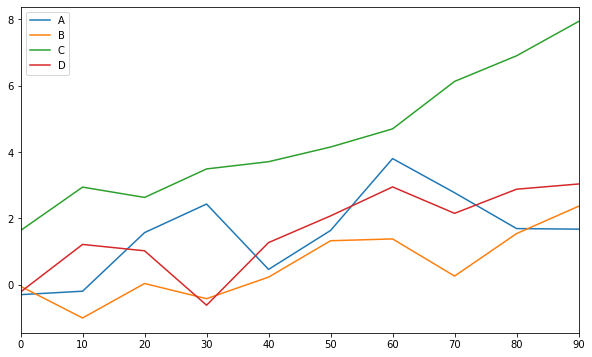

In [35]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'],
                 index=np.arange(0, 100, 10))

df.plot()

**Series.plot method arguments**

|Argument| Description|
|--|--|
|label| Label for plot legend|
|ax| matplotlib subplot object to plot on; if nothing passed, uses active matplotlib subplot|
|style| Style string, like 'ko--', to be passed to matplotlib|
|alpha| The plot fill opacity (from 0 to 1)|
|kind| Can be 'area', 'bar', 'barh', 'density', 'hist', 'kde', 'line', 'pie'|
|logy| Use logarithmic scaling on the y-axis|
|use_index| Use the object index for tick labels|
|rot| Rotation of tick labels (0 through 360)|
|xticks| Values to use for x-axis ticks|
|yticks| Values to use for y-axis ticks
|xlim| x-axis limits (e.g., [0, 10])|
|ylim| y-axis limits|
|grid| Display axis grid (on by default)|

***DataFrame-specific plot arguments***

|Argument| Description|
|--|--|
|subplots| Plot each DataFrame column in a separate subplot|
|sharex| If subplots=True, share the same x-axis, linking ticks and limits|
sharey| If subplots=True, share the same y-axis|
|figsize| Size of figure to create as tuple|
|title| Plot title as string|
|legend| Add a subplot legend (True by default)|
|sort_columns| Plot columns in alphabetical order; by default uses existing column order|

## Bar Plots

In [36]:
# plot.bar() and plot.barh() make vertical and horizontal bar plots

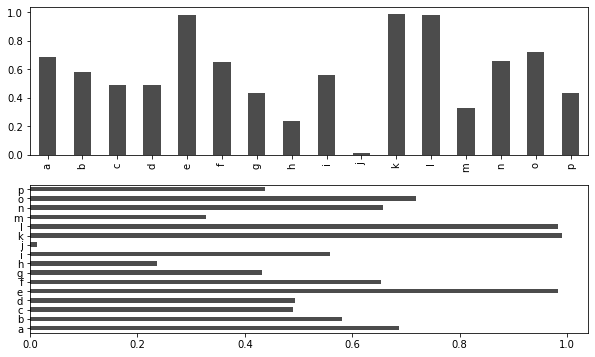

In [37]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

With a DataFrame, bar plots group the values in each row together in a group in bars,
side by side, for each value. 

In [38]:
df = pd.DataFrame(np.random.rand(6, 4), index=[
                  'one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.301686,0.156333,0.371943,0.270731
two,0.750589,0.525587,0.689429,0.358974
three,0.381504,0.667707,0.473772,0.632528
four,0.942408,0.180186,0.708284,0.641783
five,0.840278,0.909589,0.010041,0.653207
six,0.062854,0.589813,0.811318,0.060217


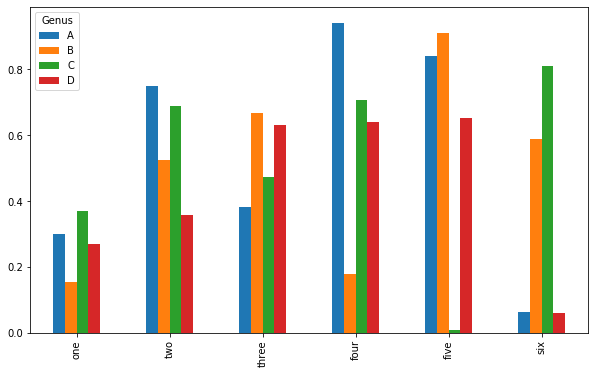

In [39]:
df.plot.bar()
# Note that the name “Genus” on the DataFrame’s columns is used to title the legend.

We create stacked bar plots from a DataFrame by passing **stacked=True**, resulting in the value in each row being stacked together

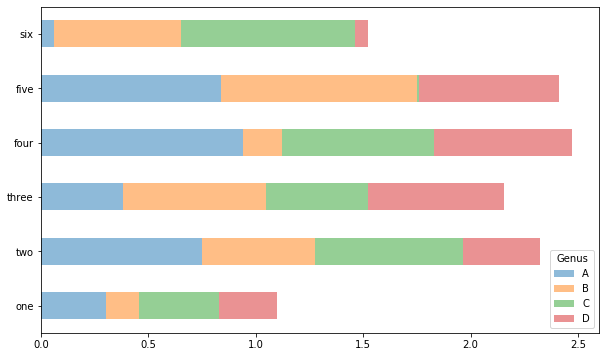

In [40]:
df.plot.barh(stacked=True, alpha=0.5)

In [41]:
tips = pd.read_csv(r'examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [42]:
# https://chrisalbon.com/python/data_wrangling/pandas_crosstabs/

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [43]:
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [44]:
print(party_counts.sum(1))
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64


In [45]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


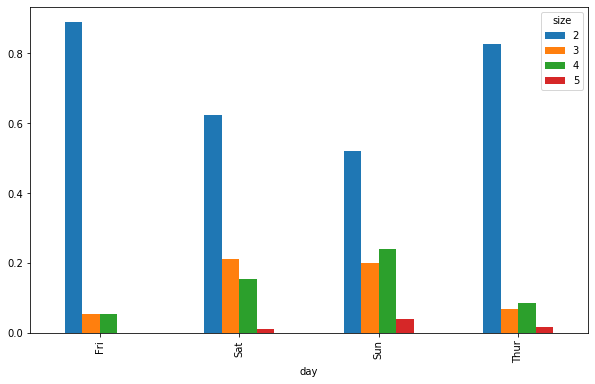

In [46]:
party_pcts.plot.bar()

In [47]:
# same plot using seaborn

import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [48]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


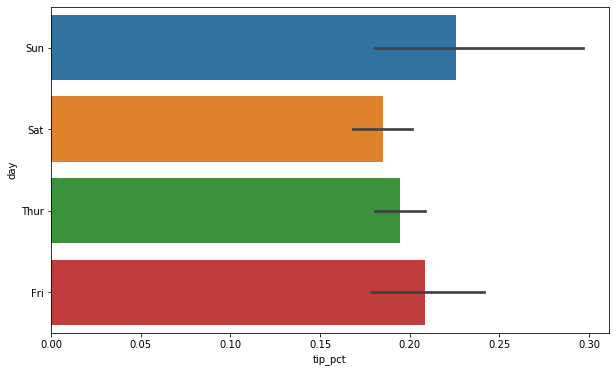

In [49]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

seaborn.barplot has a ***hue*** option that enables us to split by an additional categorical value

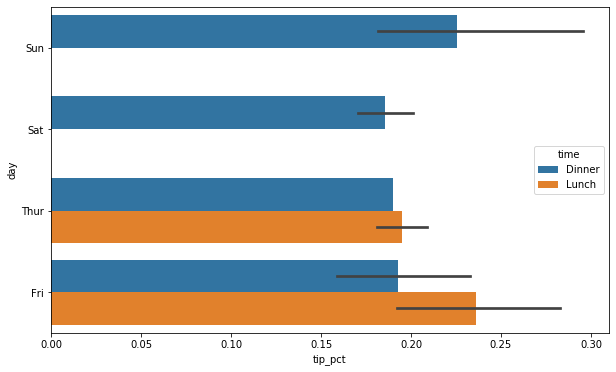

In [50]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

## Histograms and Density Plots

A histogram is a kind of bar plot that gives a discretized display of value frequency.
The data points are split into discrete, evenly spaced bins, and the number of data
points in each bin is plotted.

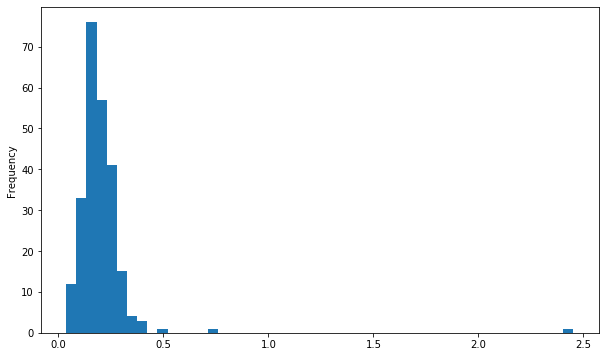

In [51]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is a density plot, which is formed by computing an estimate of a continuous probability distribution that might have generated the observed data. The usual procedure is to approximate this distribution as a mixture of “kernels”—that is, simpler distributions like the normal distribution. Thus, density plots are also known as kernel density estimate (KDE) plots. Using plot.kde makes a density plot using the conventional mixture-of-normals estimate 

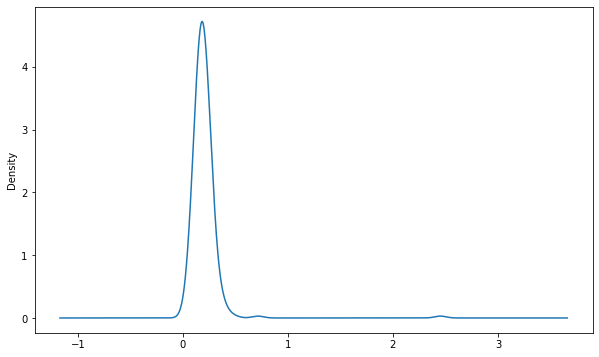

In [52]:
tips['tip_pct'].plot.density()

Seaborn makes histograms and density plots even easier through its **distplot**
method, which can plot both a histogram and a continuous density estimate simulta‐
neously

In [53]:
# example - bimodal distribution consisting of draws from
# two different standard normal distributions

In [54]:
comp1 = np.random.normal(0, 1, size=200)

In [55]:
comp2 = np.random.normal(10, 2, size=200)

In [56]:
values = pd.Series(np.concatenate([comp1, comp2]))

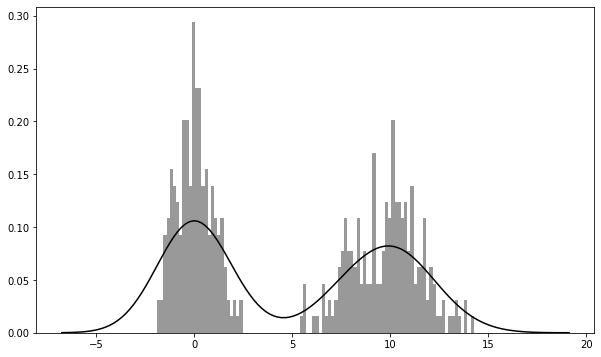

In [57]:
sns.distplot(values, bins=100, color='k')

## Scatter or Points Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series. 

In [58]:
macro = pd.read_csv(r'examples/macrodata.csv')

In [59]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [60]:
trans_data = np.log(data).diff().dropna()

In [61]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


***We can then use seaborn’s regplot method, which makes a scatter plot and fits a linear regression line***

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

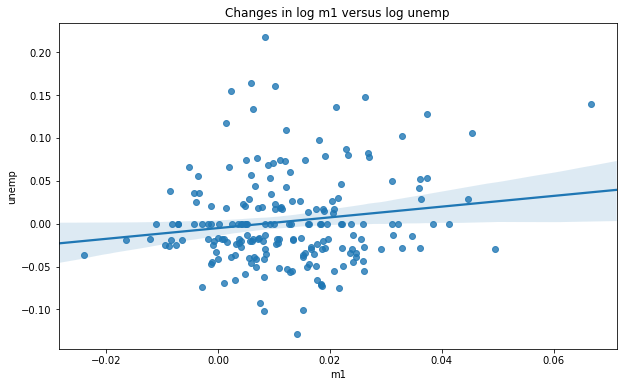

In [62]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title(f"Changes in log {'m1'} versus log {'unemp'}")

In exploratory data analysis it’s helpful to be able to look at all the scatter plots among a group of variables; this is known as a ***pairs plot*** or ***scatter plot matrix***. Making such a plot from scratch is a bit of work, so seaborn has a convenient **pairplot** function, which supports placing histograms or density estimates of each variable along the diagonal

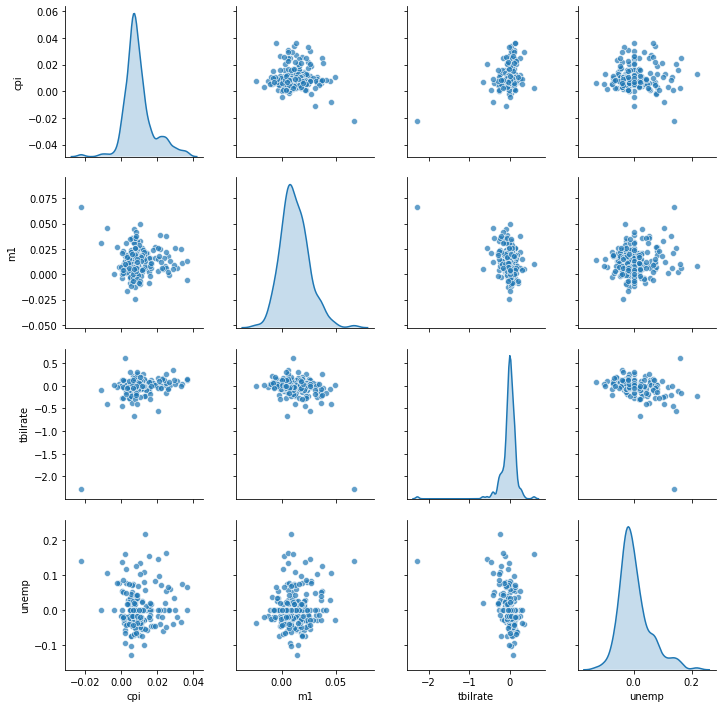

In [63]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.7})

**plot_kws** - enables us to pass down configuration options to the individual plotting calls on the off-diagonal elements.

## Facet Grids and Categorical Data

What about datasets where we have additional grouping dimensions? One way to visualize data with many categorical variables is to use a facet grid. Seaborn has a useful built-in function **factorplot** that simplifies making many kinds of faceted plots 

* renamed to **catplot**

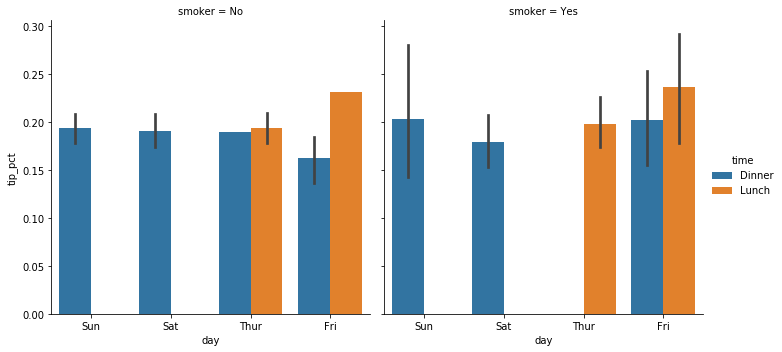

In [64]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

Instead of grouping by 'time' by different bar colors within a facet, we can also expand the facet grid by adding one row per time value

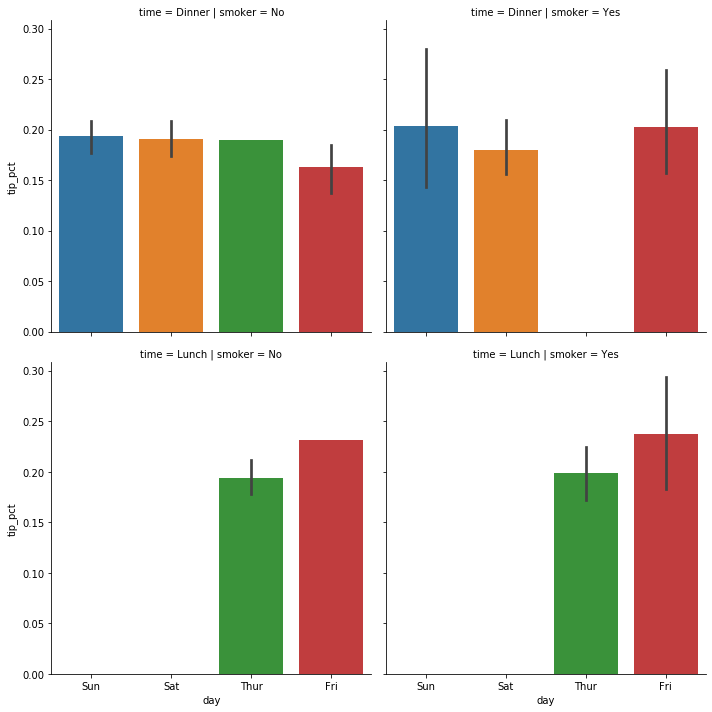

In [65]:
sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar',
            data=tips[tips.tip_pct < 1])

***catplot*** supports other plot types that may be useful depending on what you are trying to display. For example, box plots (which show the median, quartiles, and outliers) can be an effective visualization type

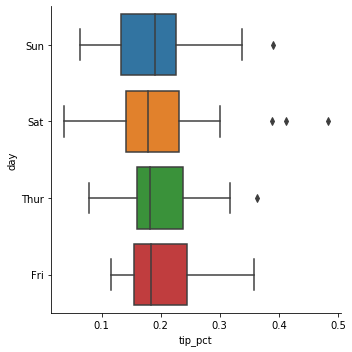

In [66]:
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])